### Importing the libraries

In [1]:
# For Data preprocessing and mathematical computing operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# For path operations
import os
import os.path
from pathlib import Path
import glob

# For Image Preprocessing
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters

In [2]:
# Scaling and Transformation operations of image data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

# Libraries for accuracy control
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Optimization and Data Reduction Algorithms
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

# Layers for the implementation of Convolutional Neural Network algorithms
from tensorflow.keras.models import Sequential
from keras.layers import 
(Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,
Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, 
SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D)

from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers

In [3]:
# Importing other algorithms
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [4]:
# To ignore un necessary warnings
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# Reading Paths of the image dataset

In [5]:
Indian_Sign_Main_Path = Path("D:\ML Project 4th year\Indian")

In [6]:
Sign_JPG = list(Indian_Sign_Main_Path.glob(r"*/*.jpg"))

In [7]:
Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))

## Creating data frame

### Creating labels and image series data

In [8]:
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")

### Concatenating the series data and creating a DataFrame

In [9]:
Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)

In [10]:
print(Main_Sign_Data.head(-1))

                                            JPG CATEGORY
0         D:\ML Project 4th year\Indian\1\0.jpg        1
1         D:\ML Project 4th year\Indian\1\1.jpg        1
2        D:\ML Project 4th year\Indian\1\10.jpg        1
3       D:\ML Project 4th year\Indian\1\100.jpg        1
4      D:\ML Project 4th year\Indian\1\1000.jpg        1
...                                         ...      ...
42739   D:\ML Project 4th year\Indian\Z\994.jpg        Z
42740   D:\ML Project 4th year\Indian\Z\995.jpg        Z
42741   D:\ML Project 4th year\Indian\Z\996.jpg        Z
42742   D:\ML Project 4th year\Indian\Z\997.jpg        Z
42743   D:\ML Project 4th year\Indian\Z\998.jpg        Z

[42744 rows x 2 columns]


## Visualization

### Functions for the implementation of various image view methods

In [11]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    return Picking_Img

In [12]:
def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img

In [13]:
def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [14]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img

In [15]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img

### Image Visualization in different modes

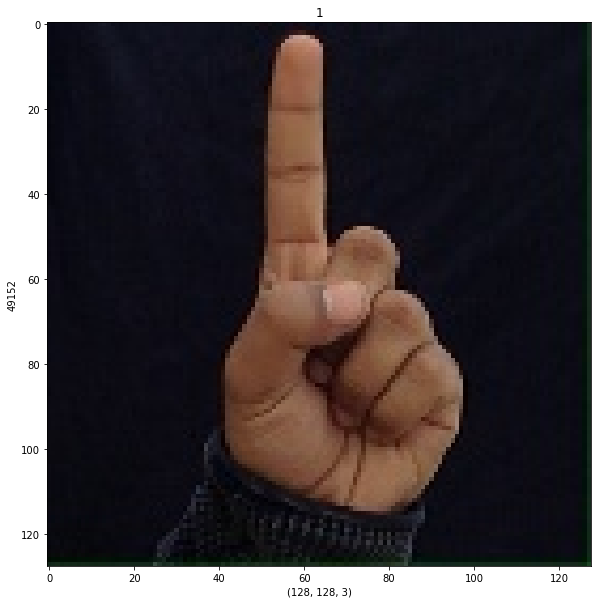

In [16]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign)

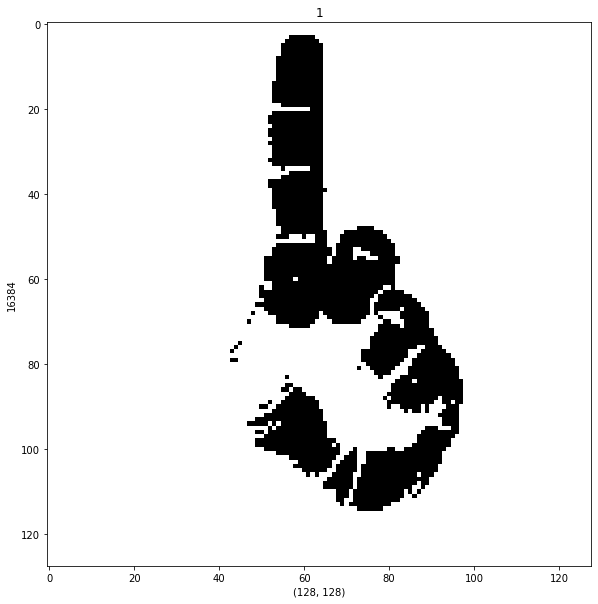

In [17]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

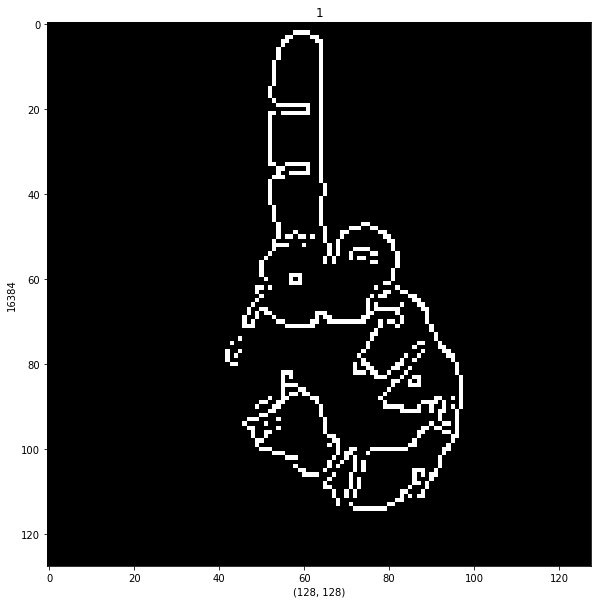

In [18]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, '1')

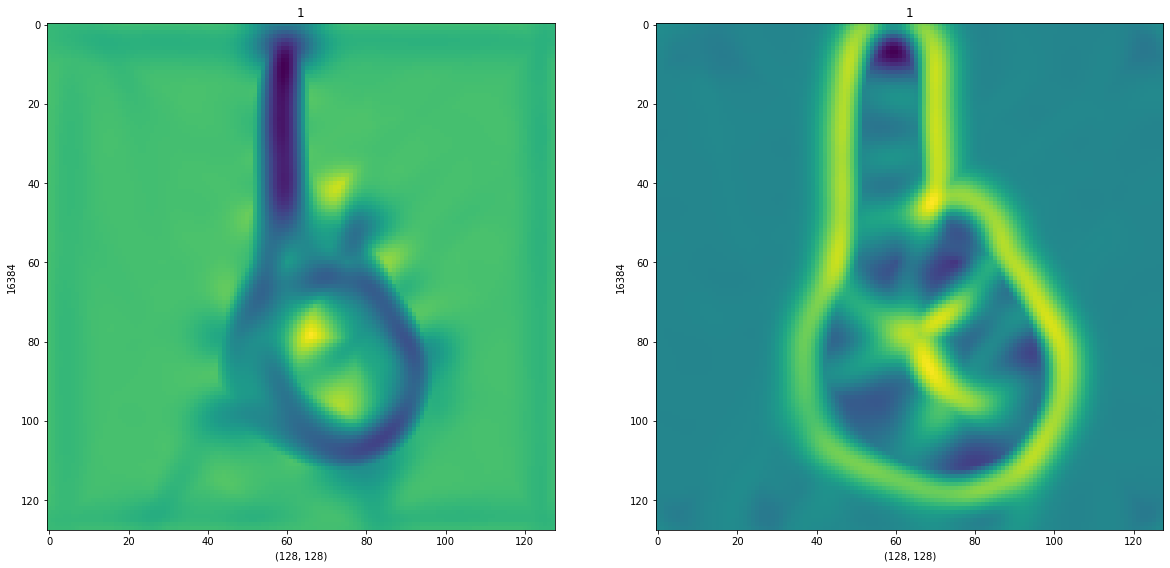

In [19]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][33]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

Text(0.5, 1.0, '1')

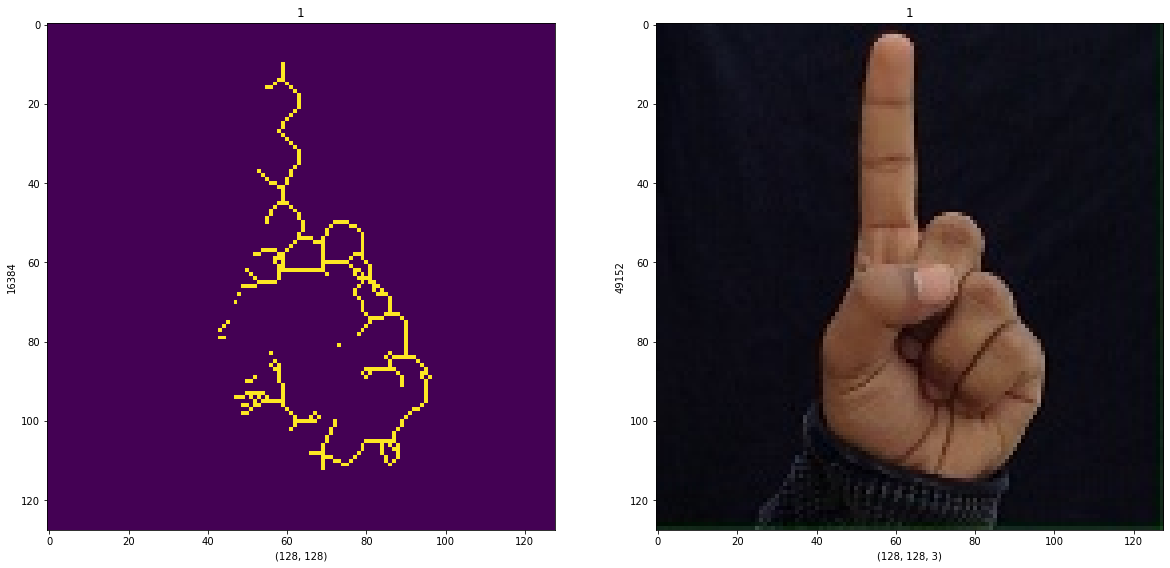

In [20]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][33])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][33])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

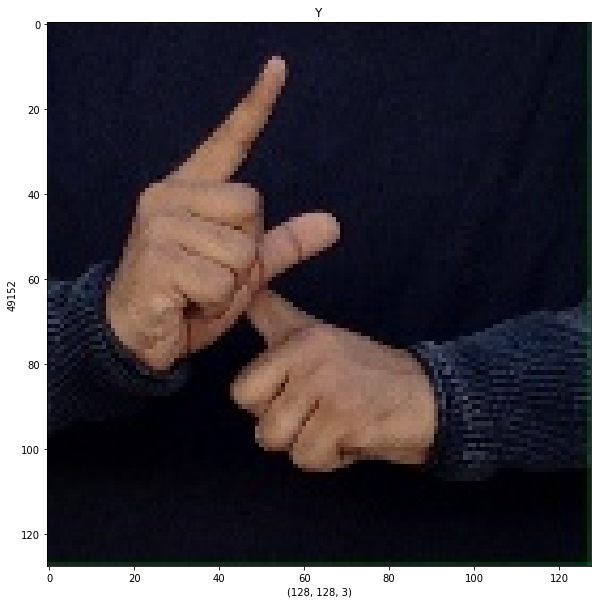

In [21]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign)

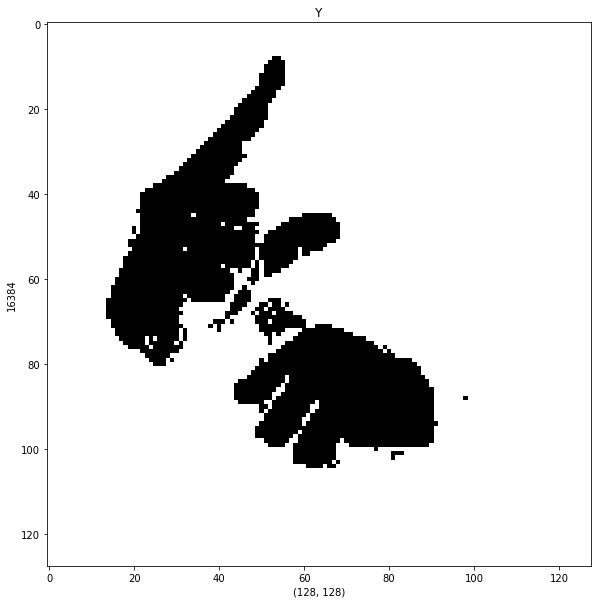

In [22]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

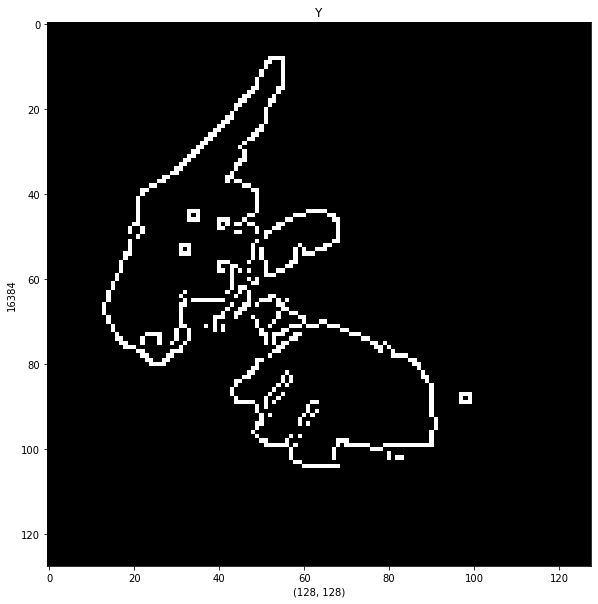

In [23]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, 'Y')

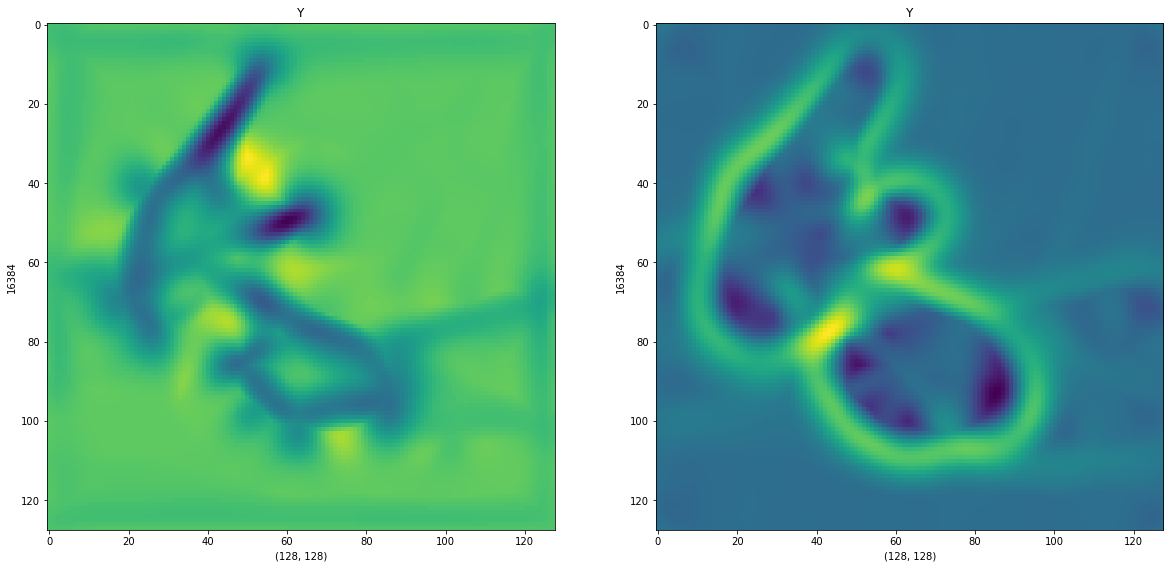

In [24]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][41113]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][41113])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][41113])

Text(0.5, 1.0, 'J')

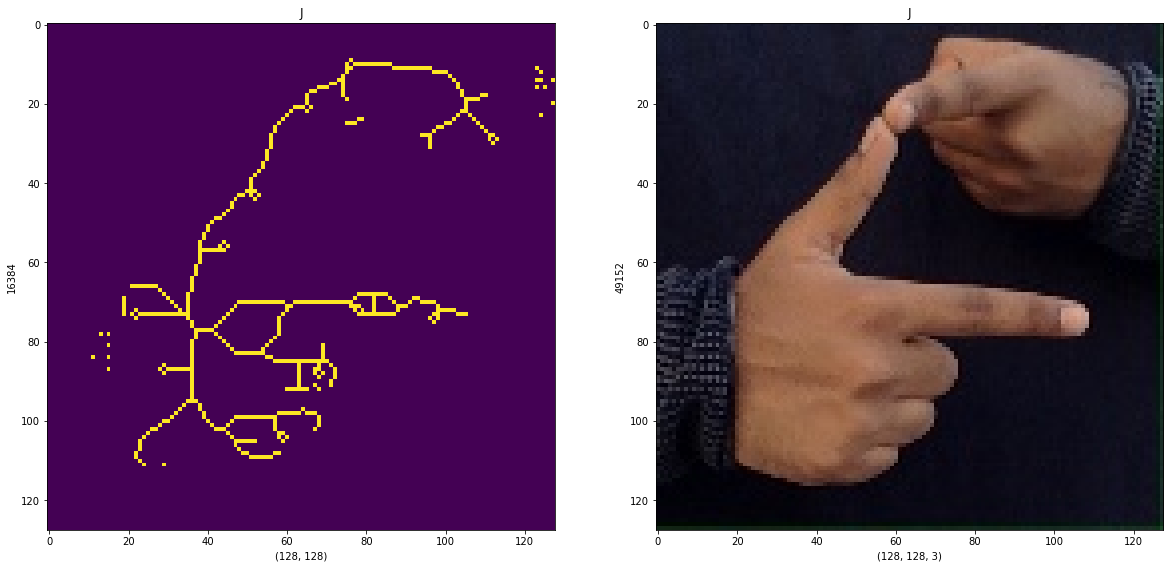

In [25]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][22213])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][22213])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][22213])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][22213])


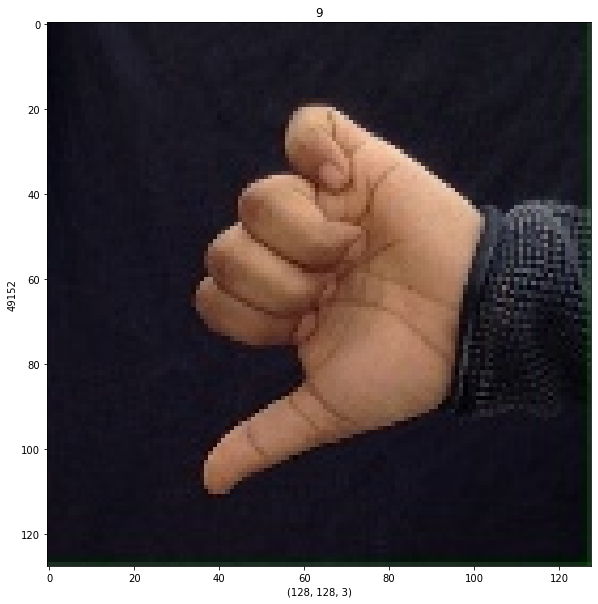

In [26]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][10000])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][10000])
plt.imshow(Image_Sign)

In [27]:
X_Train, X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)

In [28]:
print(X_Train.shape)
print(X_Test.shape)

(38470, 2)
(4275, 2)


In [29]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
training_image_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.5,
    shear_range=0.5,
    brightness_range=[0.6,1.0],
    rotation_range=35,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    featurewise_std_normalization=False,
    samplewise_center=False,
    samplewise_std_normalization=False,
    fill_mode="nearest",
    validation_split=0.1
)

In [31]:
testing_image_generator = ImageDataGenerator(rescale=1./255)

In [32]:
from tensorflow.keras.utils import img_to_array

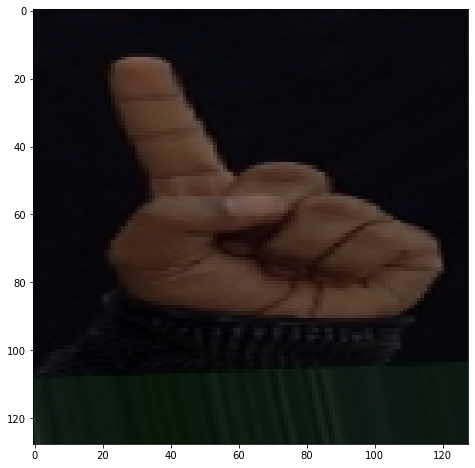

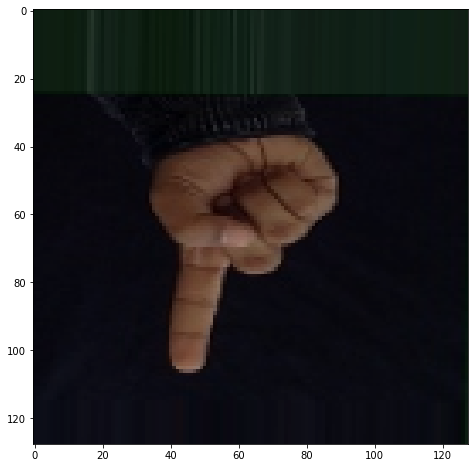

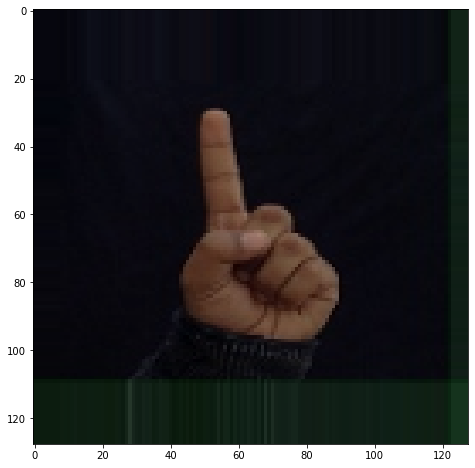

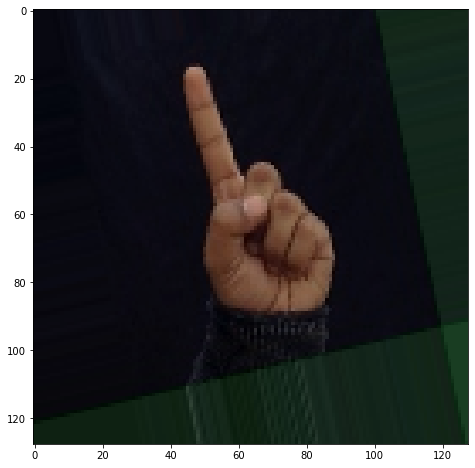

In [33]:
Example_Img = simple_vision(X_Train.JPG[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0 

for batch in training_image_generator.flow(Example_Img,batch_size=32):
    
    figure = plt.figure(figsize=(8,8))
    plt.imshow(img_to_array(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break
        
plt.show()